# Imports

In [1]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/anarpo22/miniconda3/envs/tangram-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'tangram'

# Load data  

In [2]:
adata_st = sq.datasets.visium_fluo_adata_crop()
adata_st = adata_st[
    adata_st.obs.cluster.isin([f"Cortex_{i}" for i in np.arange(1, 5)])
].copy()
img = sq.datasets.visium_fluo_image_crop()

adata_sc = sq.datasets.sc_mouse_cortex()

# Get training genes

In [4]:
sc.tl.rank_genes_groups(adata_sc, groupby="cell_subclass", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1401

In [5]:
tg.pp_adatas(adata_sc, adata_st, genes=markers)

INFO:root:1280 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:14785 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [5]:
#Pick a spot at random
np.random.seed(22)
voxel = int(np.random.randint(1, adata_st.n_obs, 1))

In [6]:
cell_candidates_over_runs = dict()

for i in range(10):
    ad_map = tg.map_cells_to_space(adata_sc, adata_st,
        mode="cells",
        density_prior='rna_count_based',
        num_epochs=500,
        device='cpu',
    )
    #visit rand_voxel and store in dict set of cells with prob > 20%
    indices = np.where(ad_map.X[:, voxel] > 0.2)[0]
    
    cell_candidates_over_runs[i] = set(ad_map.obs_names[indices])

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


### Intersection of candidates over all iterations

In [9]:
new_set = cell_candidates_over_runs[0]

for i in range(1, 10):
    if i == 1:
        print(f"Intersection between set {i-1} and {i}:")
    else:
        print(f"Intersection between the previous intersection and set {i}:")
    new_set = cell_candidates_over_runs[i] & new_set
    print(f"Size of intersection:", len(new_set))


Intersection between set 0 and 1:
Size of intersection: 47
Intersection between the previous intersection and set 2:
Size of intersection: 26
Intersection between the previous intersection and set 3:
Size of intersection: 19
Intersection between the previous intersection and set 4:
Size of intersection: 16
Intersection between the previous intersection and set 5:
Size of intersection: 14
Intersection between the previous intersection and set 6:
Size of intersection: 9
Intersection between the previous intersection and set 7:
Size of intersection: 9
Intersection between the previous intersection and set 8:
Size of intersection: 9
Intersection between the previous intersection and set 9:
Size of intersection: 8


In [21]:
# Find indices of these cells in ad_map.obs
cell_indices = [i for i, cell in enumerate(ad_map.obs.index) if cell in new_set]

# Extract probability values for voxel 133
voxel_idx = 133
probabilities = ad_map.X[cell_indices, voxel_idx]

# Create a dictionary to store cell names and their probabilities
cell_prob_dict = {cell: prob for cell, prob in zip(new_set, probabilities)}

# Print results
for cell, prob in cell_prob_dict.items():
    print(f"Cell: {cell}, Probability in Voxel {voxel_idx}: {prob:.4f}")

Cell: F2S4_170324_011_D01, Probability in Voxel 133: 0.9981
Cell: F2S4_160129_017_D01, Probability in Voxel 133: 0.3053
Cell: F2S4_160627_007_H01, Probability in Voxel 133: 0.6346
Cell: F2S4_160421_012_H01, Probability in Voxel 133: 0.9987
Cell: F2S4_160915_004_E01, Probability in Voxel 133: 0.9024
Cell: F2S4_171018_001_A01, Probability in Voxel 133: 0.6038
Cell: F2S4_160603_005_B01, Probability in Voxel 133: 0.2995
Cell: F2S4_160405_012_H01, Probability in Voxel 133: 0.9930


# heatmap????

In [8]:
def plot_map_consistency(adata_sc, adata_st, n_iter=5, n_cells=10):
    
    np.random.seed(22)    
    cell_indices = np.random.randint(0, adata_sc.n_obs, n_cells) #pick n random cells
    
    plot_array = np.zeros((n_cells, adata_st.n_obs)) #init array w dims (n_cells, voxels)
    
    for i in range(n_iter):
        
        #run Tangram mapping
        ad_map = tg.map_cells_to_space(
            adata_sc, adata_st,
            mode="cells",
            density_prior='rna_count_based',
            num_epochs=500,
            device='cpu'
        )
        
        plot_array += ad_map.X[cell_indices, :] #accumulate probabilities
    
    plot_array /= n_iter  #compute the weighed average probability
    
    voxel_coords = adata_st.obsm["spatial"]  #get voxel coordinates

    #plot heatmaps for each selected cell
    for i, cell_idx in enumerate(cell_indices):
        plt.figure(figsize=(6, 5))
        
        # Mask zero values (set to NaN for custom coloring)
        probabilities = plot_array[i, :]
        masked_probs = np.ma.masked_where(probabilities < 0.05, probabilities)
        
        sc = plt.scatter(
            voxel_coords[:, 0], voxel_coords[:, 1], 
            c=masked_probs, vmin=0.05, vmax=1, cmap="plasma"
        )
        
        sc.cmap.set_bad(color="lightgray")

        
        plt.colorbar(sc, label="Mean Probability")
        plt.title(f"Mapping Consistency for Cell {cell_idx}")
        plt.axis("off")  # Hide axis for cleaner visualization
        plt.show()


INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


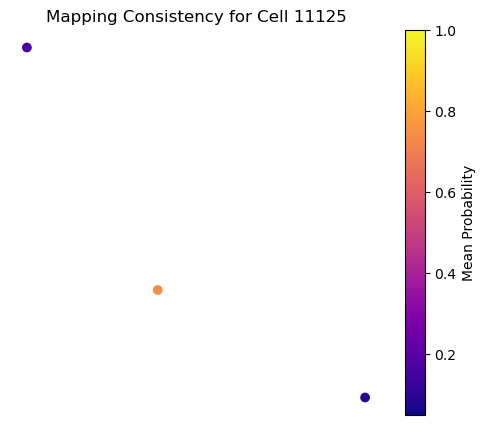

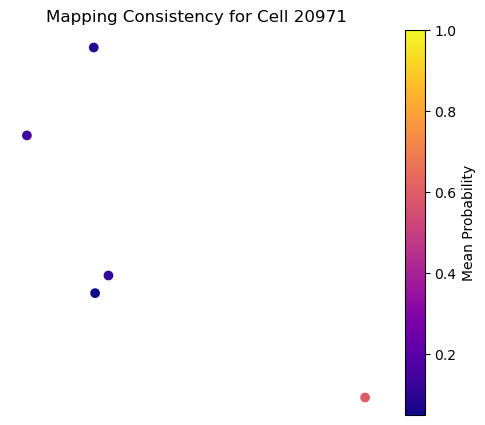

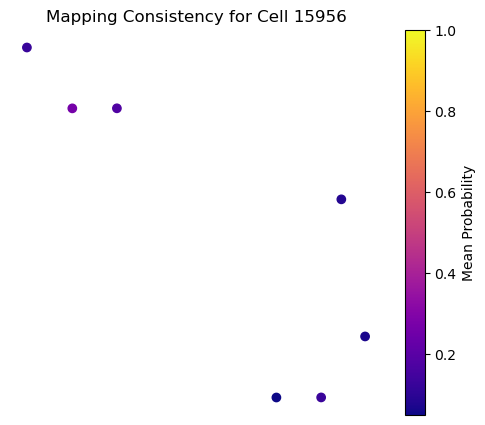

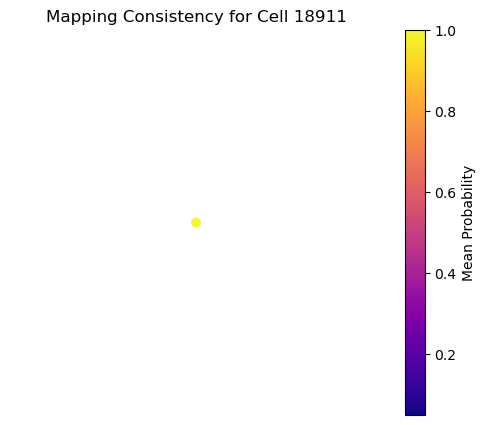

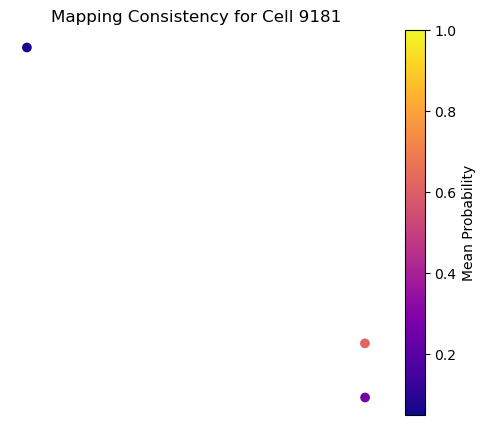

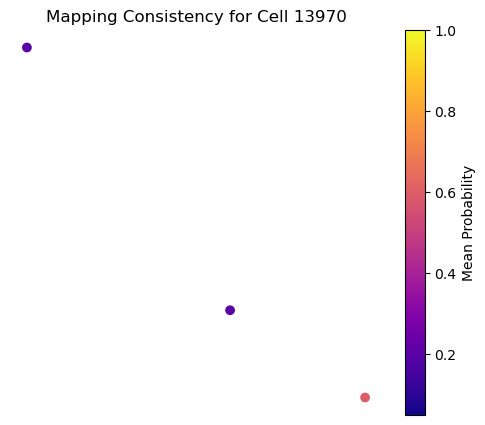

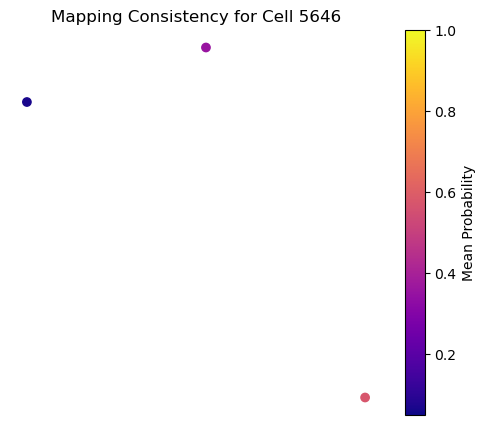

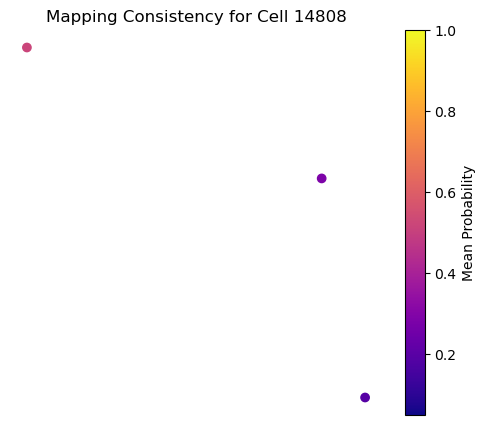

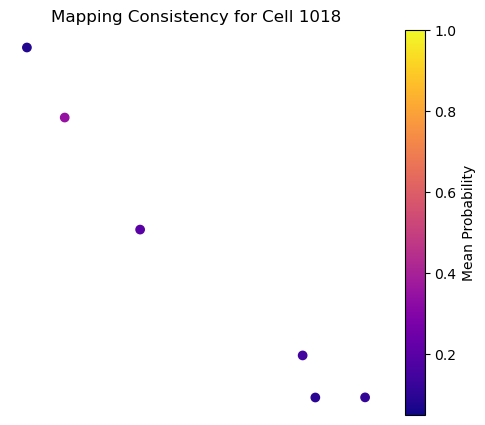

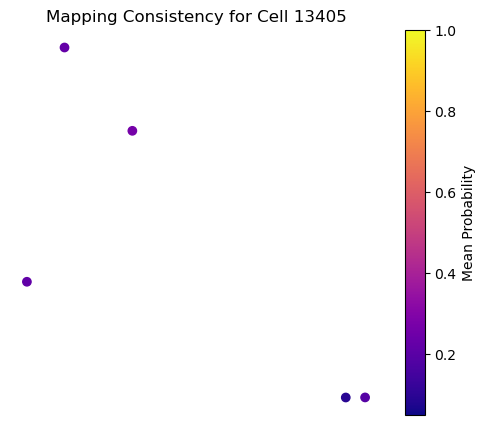

In [9]:
plot_map_consistency(adata_sc, adata_st, n_iter=5, n_cells=10)

# plot to devise threshold

In [13]:
def plot_threshold(adata_sc, adata_st, n_iter=5):
    
    for i in range(n_iter):
        
        #run Tangram mapping
        ad_map = tg.map_cells_to_space(
            adata_sc, adata_st,
            mode="cells",
            density_prior='rna_count_based',
            num_epochs=500,
            device='cpu'
        )
        
        max_prob_per_cell = np.max(ad_map.X, axis = 1)
        sorted_max_prob = np.sort(max_prob_per_cell)[::-1]

        plt.plot(sorted_max_prob)

        # Add labels and title
        plt.xlabel("Ordered cells")
        plt.ylabel("Probability")

        # Show the plot
        plt.show()

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


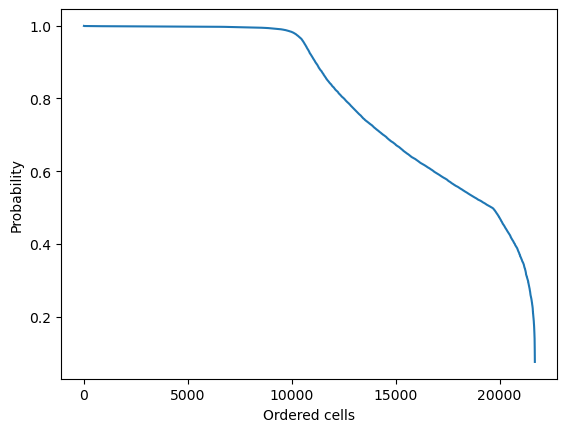

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


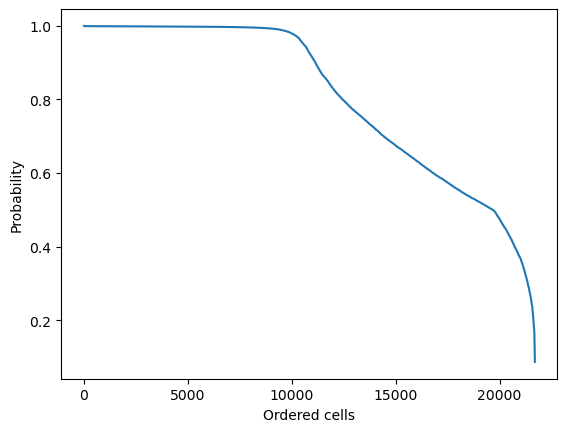

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


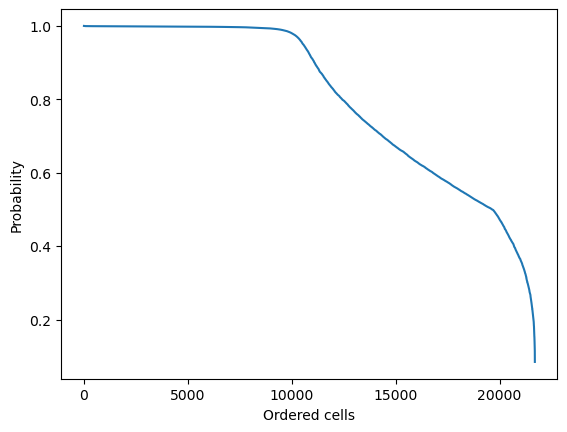

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


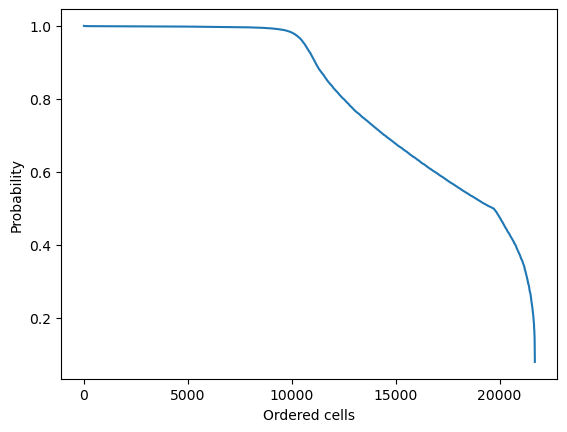

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


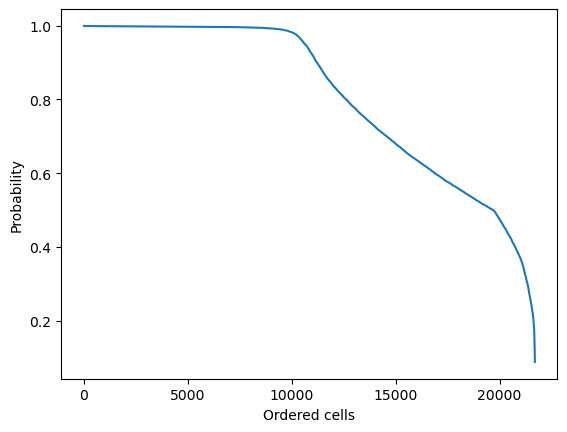

In [15]:
plot_threshold(adata_sc, adata_st, n_iter=5)

# PLOT OVER RUNS

In [6]:
def plot_over_runs(adata_sc, adata_st, n_iter=5, n_cells=10):
    np.random.seed(22)    
    cell_indices = np.random.randint(0, adata_sc.n_obs, n_cells)  # Pick n random cells
    voxel_coords = adata_st.obsm["spatial"]  # Get voxel coordinates

    fig, axs = plt.subplots(n_cells, n_iter, figsize=(n_iter * 3, n_cells * 3))
    
    for col in range(n_iter):  # Iterate over runs
        # Run Tangram mapping
        ad_map = tg.map_cells_to_space(
            adata_sc, adata_st,
            mode="cells",
            density_prior='rna_count_based',
            num_epochs=500,
            device='cpu'
        )        
        
        for row, cell_idx in enumerate(cell_indices):  # Iterate over selected cells
            ax = axs[row, col] if n_cells > 1 else axs[col]  # Handle edge case for 1 cell
            
            # Get probability distribution for this cell
            probabilities = ad_map.X[cell_idx, :]
            masked_probs = np.ma.masked_where(probabilities < 0.05, probabilities)

            sc = ax.scatter(
                voxel_coords[:, 0], voxel_coords[:, 1], 
                c=masked_probs, vmin=0.05, vmax=1, cmap="plasma"
            )
            sc.cmap.set_bad(color="lightgray")

            ax.set_title(f"Cell {cell_idx}, Run {col+1}")
            ax.axis("off")  # Hide axis for cleaner visualization

    # Add single colorbar for all subplots
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Colorbar position
    fig.colorbar(sc, cax=cbar_ax, label="Mapping Probability")

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
    plt.show()


INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


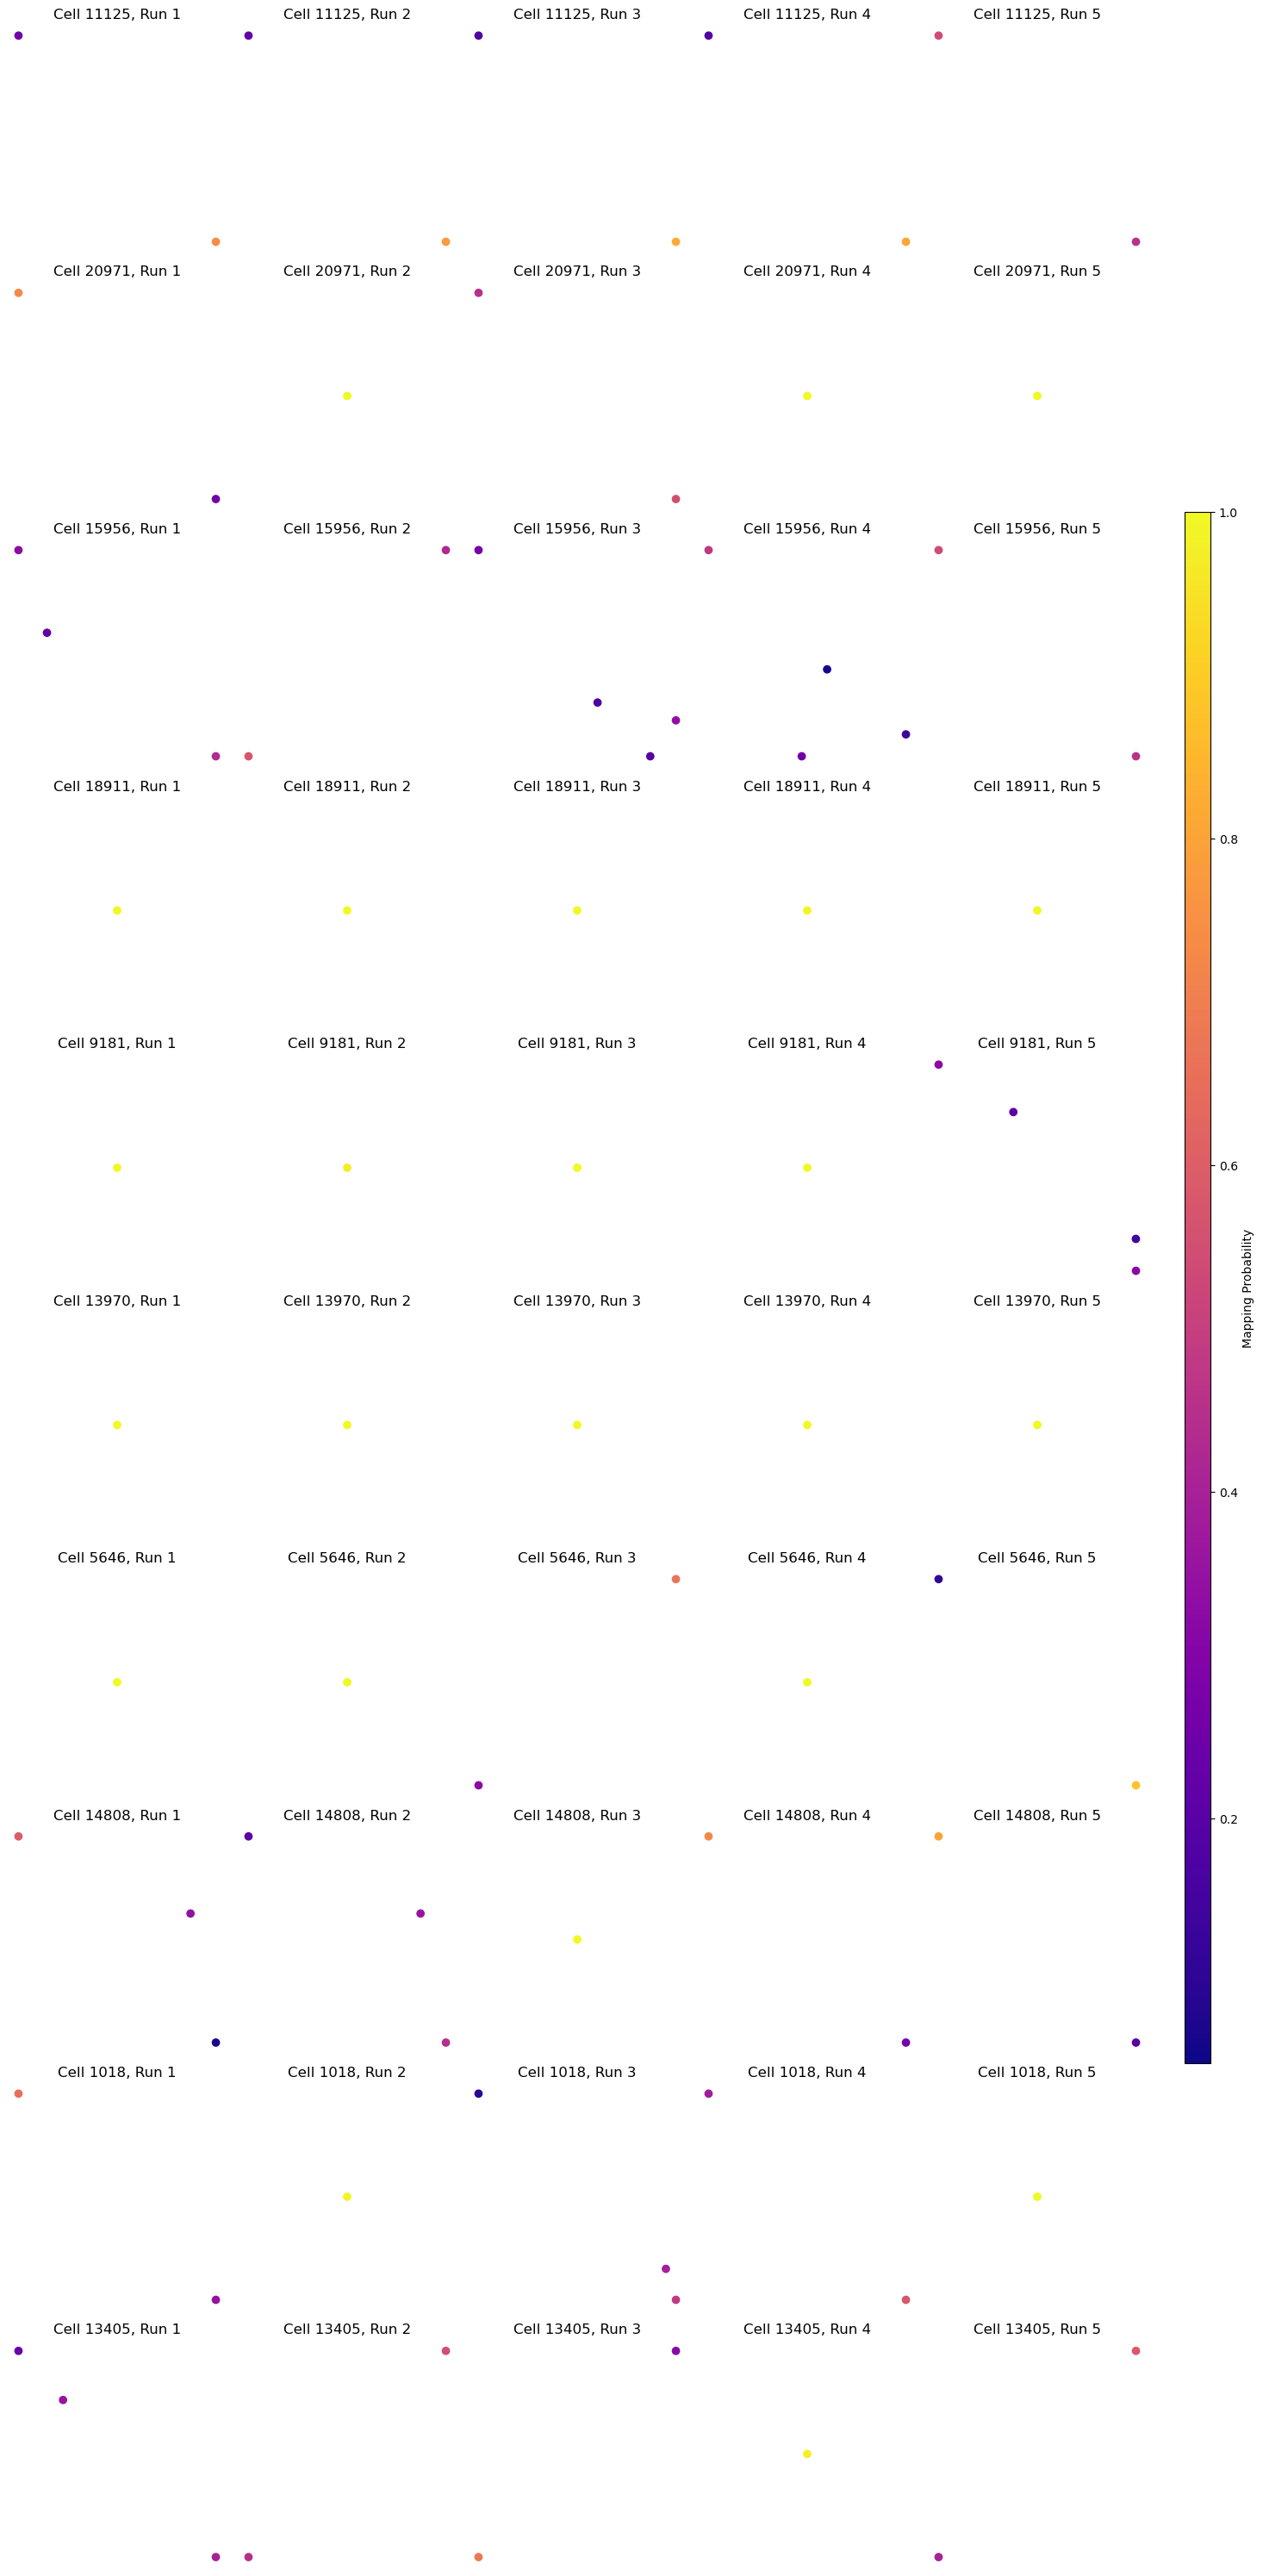

In [7]:
plot_over_runs(adata_sc, adata_st)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1280 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.613, KL reg: 0.001
Score: 0.733, KL reg: 0.000
Score: 0.736, KL reg: 0.000
Score: 0.737, KL reg: 0.000
Score: 0.737, KL reg: 0.000


INFO:root:Saving results..


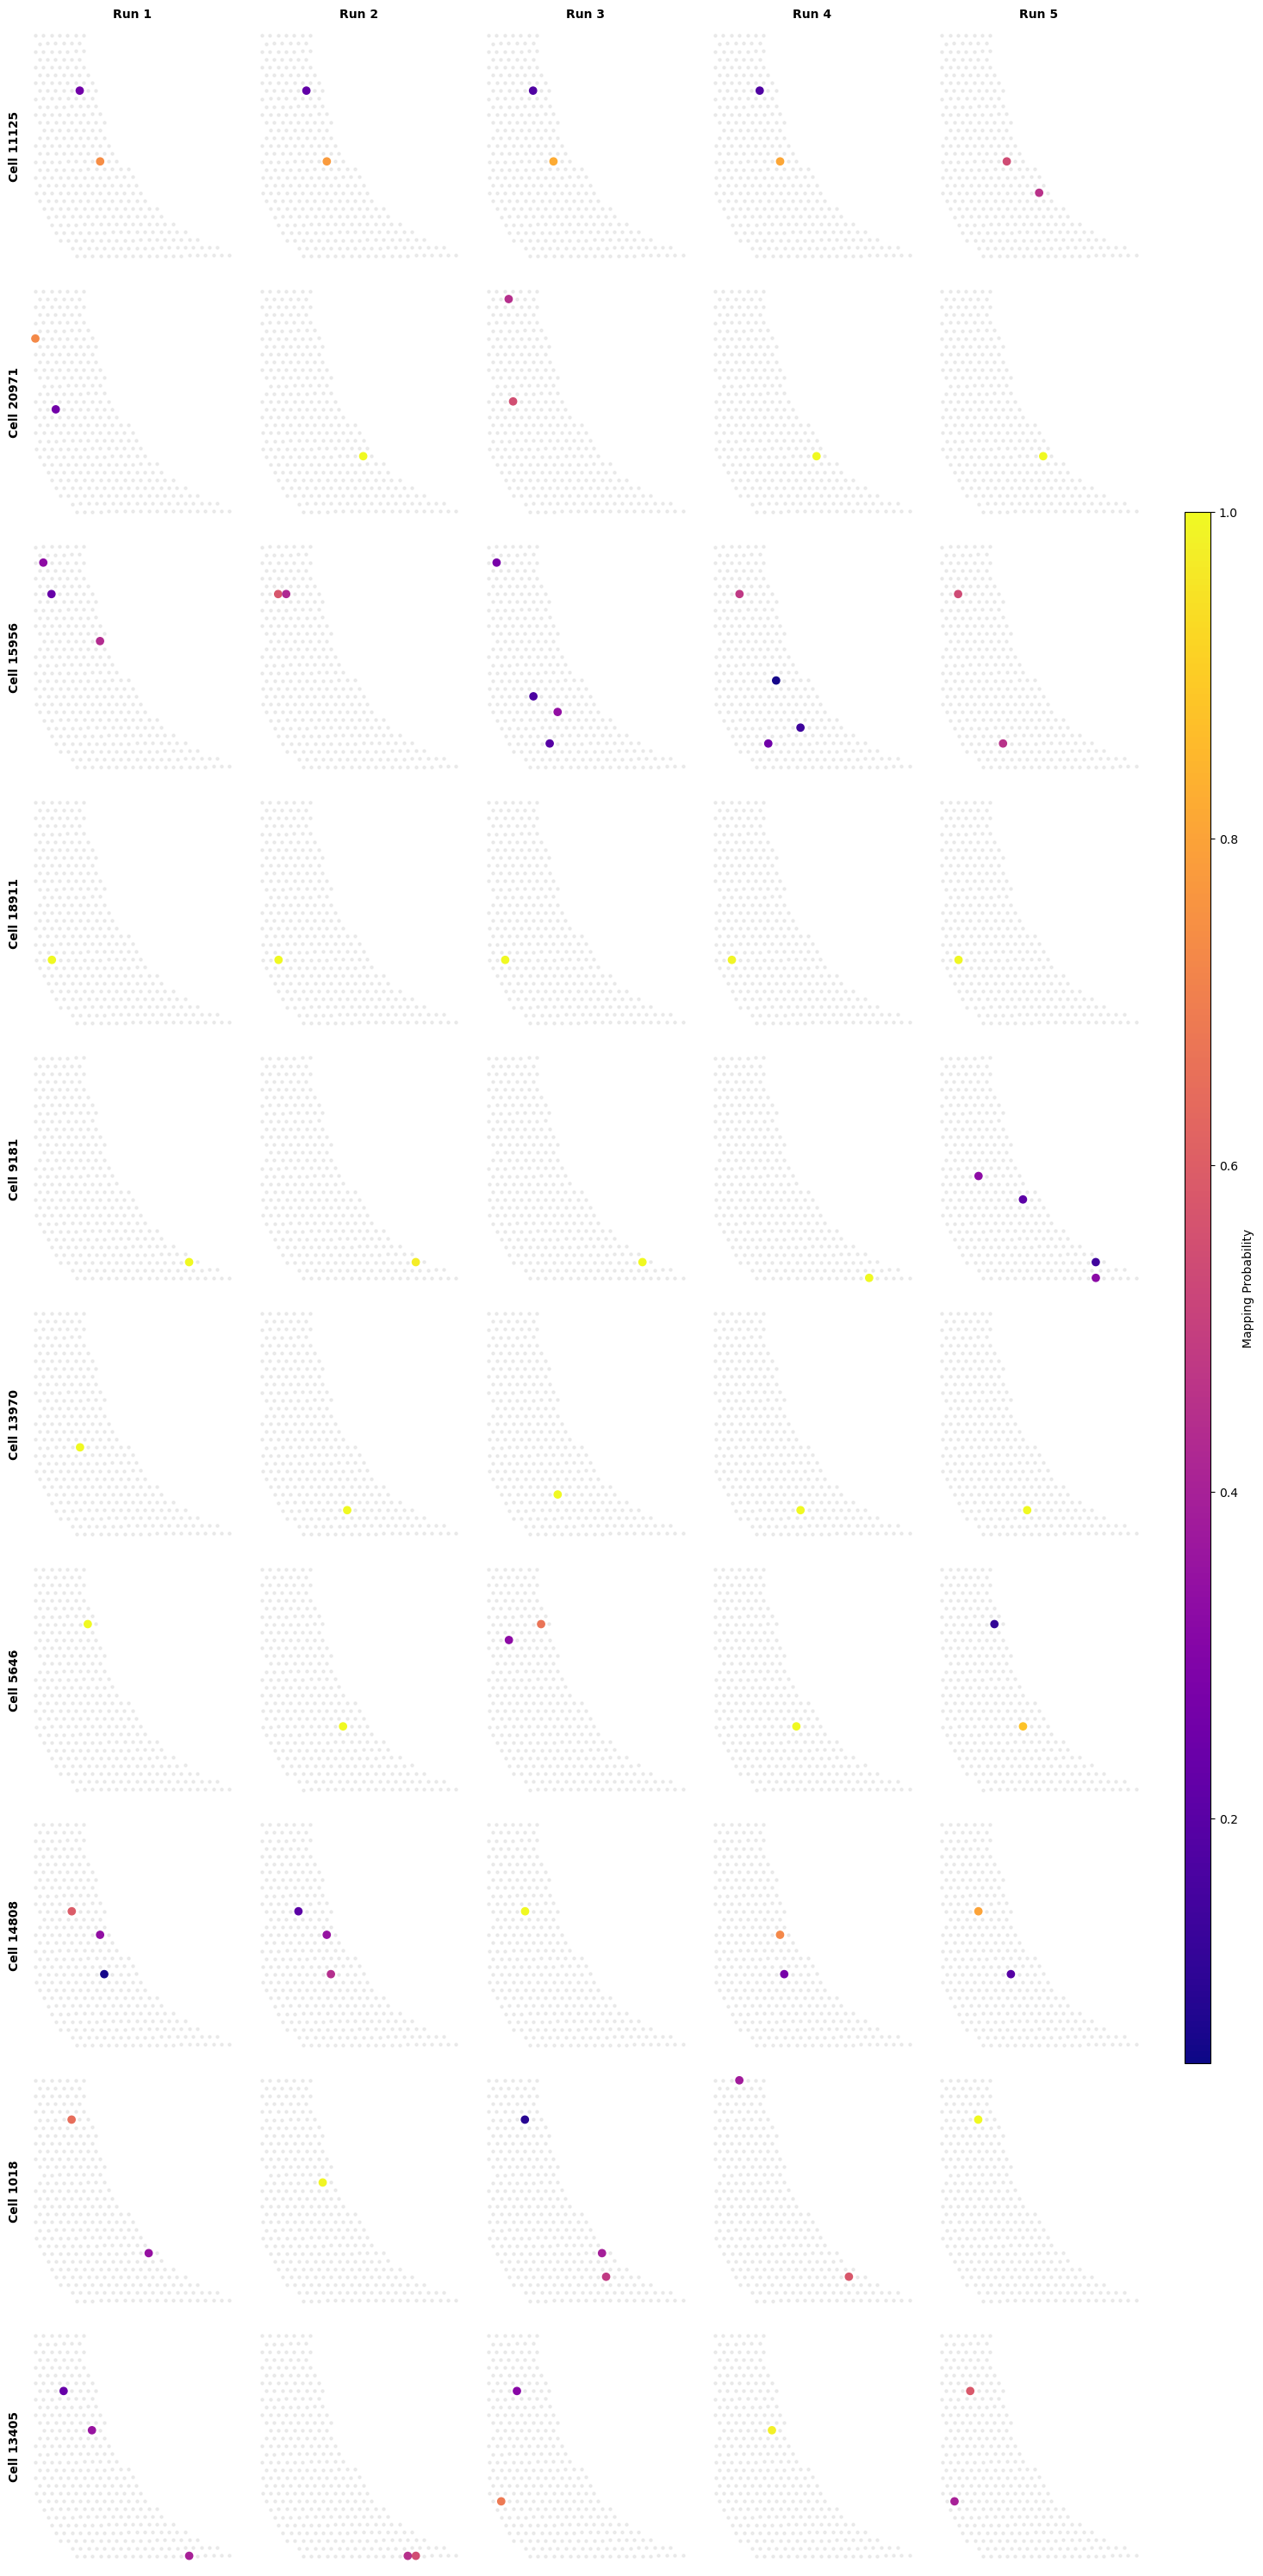

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tangram as tg

def plot_over_runs(adata_sc, adata_st, n_iter=5, n_cells=10):
    np.random.seed(22)    
    cell_indices = np.random.randint(0, adata_sc.n_obs, n_cells)  # Pick n random cells
    voxel_coords = adata_st.obsm["spatial"]  # Get voxel coordinates

    fig, axs = plt.subplots(n_cells, n_iter, figsize=(n_iter * 3, n_cells * 3), sharex=True, sharey=True)
    
    for col in range(n_iter):  # Iterate over runs
        # Run Tangram mapping
        ad_map = tg.map_cells_to_space(
            adata_sc, adata_st,
            mode="cells",
            density_prior='rna_count_based',
            num_epochs=500,
            device='cpu'
        )        
        
        for row, cell_idx in enumerate(cell_indices):  # Iterate over selected cells
            ax = axs[row, col] if n_cells > 1 else axs[col]  # Handle single-row case
            
            # Get probability distribution for this cell
            probabilities = ad_map.X[cell_idx, :]
            masked_probs = np.ma.masked_where(probabilities < 0.05, probabilities)

            # Plot background in light gray
            ax.scatter(voxel_coords[:, 0], voxel_coords[:, 1], color="#DCDCDC", s=5, alpha=0.5)

            # Plot mapped probabilities with plasma colormap
            sc = ax.scatter(
                voxel_coords[:, 0], voxel_coords[:, 1], 
                c=masked_probs, vmin=0.05, vmax=1, cmap="plasma"
            )
            sc.cmap.set_bad(color="lightgray")

            # Hide axis ticks for cleaner visualization
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_frame_on(False)

            # Label first column with cell ID
            if col == 0:
                ax.set_ylabel(f"Cell {cell_idx}", fontsize=10, fontweight="bold")

            # Label top row with run number
            if row == 0:
                ax.set_title(f"Run {col+1}", fontsize=10, fontweight="bold")

    # Add single colorbar for all subplots
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Colorbar position
    fig.colorbar(sc, cax=cbar_ax, label="Mapping Probability")

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
    plt.savefig("map_over_runs.png")  # Saves in the current directory
    plt.show()
plot_over_runs(adata_sc, adata_st)